In [14]:
import numpy as np 
import pandas as pd

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from xgboost import plot_importance

In [16]:
train = pd.read_csv("../Data/text_processed.csv")
train_encoded = pd.read_pickle('../Data/train_encoded.pickle')
truth=pd.read_csv('../Data/ground_truth.csv')

In [17]:
trainset=pd.DataFrame()
testset=pd.DataFrame()

In [5]:
i=0
for i,rows in train_encoded.iterrows():
    if(rows['id']==40000):
        print(i)
        break

1056844


In [18]:
train_encoded.head(2)
i=1056844

In [6]:
# train_encoded=train_encoded.drop(train_encoded.iloc[:,301:601],axis=1)

In [19]:
trainset=train_encoded[:i]
testset=train_encoded[i:]
word=train_encoded['text'][i:]
y_train=trainset['label']
y_test=testset['label']
ID=testset['id']

In [20]:
trainset = trainset.drop(['id','label','text'],axis=1)
testset = testset.drop(['id','label','text'],axis=1)


In [9]:
col=ID.unique()
truth=truth[40000:]
truth = truth.reset_index(drop=True)


In [10]:
#model1 = XGBClassifier().fit(trainset, y_train)
model1 = LogisticRegression(random_state=100,max_iter=10000).fit(trainset, y_train)

In [11]:
# y_pred = pd.DataFrame(model1.predict(testset),index=y_test.index)
# y_pred

In [12]:
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)

In [13]:
# confusion_matrix(y_test, y_pred)

In [14]:
# from sklearn.metrics import recall_score
# recall_score(y_test, y_pred, average='binary')

In [15]:
y_pred = pd.DataFrame(model1.predict_proba(testset)[:,1],index=y_test.index,columns=['y_pred'])

In [16]:
y_pred

,y_pred
1056844,0.379319
1056845,0.007583
1056846,0.001525
1056847,0.007819
1056848,0.004390
...,...
1340975,0.004265
1340976,0.008177
1340977,0.236863
1340978,0.011076


In [17]:
analyze =pd.concat([ID,word,y_test,y_pred],axis=1)
analyze = analyze.set_index('id')
analyze

,text,label,y_pred
id,,,
40000,murder,1,0.379319
40000,of,0,0.007583
40000,general,0,0.001525
40000,robert,0,0.007819
40000,de,0,0.004390
...,...,...,...
50782,"fifteen,",0,0.004265
50782,lasting,1,0.008177
50782,barely,0,0.236863


In [18]:
top1=[]
top2=[]
top3=[]
for i in col:
    l=list(analyze.loc[i].sort_values(by=['y_pred'], ascending=False)[:3]['text'])
    top1.append(l[0])
    top2.append(l[:2])
    top3.append(l)

In [19]:
result1=0
result2=0
result3=0

for i,row in truth.iterrows():
    result1+=1 if row['biased'] in top1[i] else 0
    result2+=1 if row['biased'] in top2[i] else 0
    result3+=1 if row['biased'] in top3[i] else 0

In [20]:
result1=result1/len(truth)
result2=result2/len(truth)
result3=result3/len(truth)

In [21]:
result1

0.5836965593990541

In [22]:
result2

0.7158490216080868

In [23]:
result3

0.7854956876564964

In [24]:
train=train[40000:]
train = train.reset_index(drop=True)
top1=pd.DataFrame(top1)
top2=pd.DataFrame(top2)
top3=pd.DataFrame(top3)
result =pd.concat([train,truth,top3],axis=1)
result.columns=['before','after','biased','top1','top2','top3']
result.to_csv('../Data/result_logistic.csv',index=None)

In [25]:
# sorted_idx = np.argsort(clf.feature_importances_)[::-1]

In [26]:
import pickle
filename = '../trained_model/finalized_model_logistic_40000.sav'
pickle.dump(model1, open(filename, 'wb'))

In [5]:
import pickle
filename = '../trained_model/finalized_model_xgboost_40000.sav'
xgb_model_loaded = pickle.load(open(filename, "rb"))

In [10]:
import pickle
filename = '../trained_model/finalized_model_logistic_40000.sav'
logistic_model_loaded = pickle.load(open(filename, "rb"))

Feature: 0, Score: 0.16042
Feature: 1, Score: -0.10171
Feature: 2, Score: -0.56895
Feature: 3, Score: 0.19365
Feature: 4, Score: -0.05797
Feature: 5, Score: -1.10339
Feature: 6, Score: -0.41378
Feature: 7, Score: 0.21605
Feature: 8, Score: 0.27469
Feature: 9, Score: 0.40491
Feature: 10, Score: 0.01698
Feature: 11, Score: -0.12212
Feature: 12, Score: 0.36470
Feature: 13, Score: 0.22451
Feature: 14, Score: 0.20641
Feature: 15, Score: 0.97974
Feature: 16, Score: -0.92507
Feature: 17, Score: -0.25990
Feature: 18, Score: 0.19689
Feature: 19, Score: 0.57933
Feature: 20, Score: 0.18958
Feature: 21, Score: 0.31617
Feature: 22, Score: -0.01923
Feature: 23, Score: 0.28576
Feature: 24, Score: 0.70638
Feature: 25, Score: -0.06042
Feature: 26, Score: 0.59394
Feature: 27, Score: -0.30812
Feature: 28, Score: -0.44820
Feature: 29, Score: 0.00743
Feature: 30, Score: 0.47452
Feature: 31, Score: 0.17194
Feature: 32, Score: 0.68712
Feature: 33, Score: 0.33984
Feature: 34, Score: -0.52945
Feature: 35, Scor

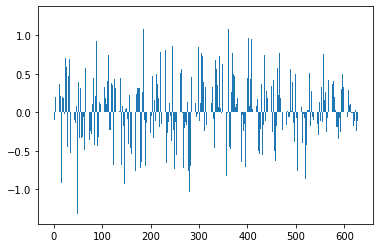

In [13]:
from matplotlib import pyplot
importance = logistic_model_loaded.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

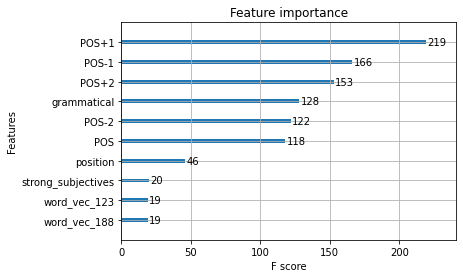

In [7]:
plot_importance(xgb_model_loaded, max_num_features = 10)


In [ ]:
from sklearn.feature_selection import RFE
model1 = LogisticRegression(random_state=100,max_iter=10000)
selector = RFE(model1, n_features_to_select=10)
selector = selector.fit(trainset, y_train)

In [ ]:
order=selector.ranking_

In [ ]:
feature_ranks=[]
for i in order:
    feature_ranks.append(f"{i}.{trainset.columns[i]}")